<img src='./img/intel-logo.jpg' width=50%, Fig1> 

# OpenCV 기초강좌 

<font size=5><b>04.Pyramids<b></font>

<div align='right'>성  민  석 (Minsuk  Sung)</div>
<div align='right'>류  회  성 (Hoesung Ryu)</div>

<img src='./img/OpenCV_Logo_with_text.png' width=20%, Fig2> 


---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#들어가기-앞서" data-toc-modified-id="들어가기-앞서-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>들어가기 앞서</a></span></li><li><span><a href="#Gaussian-Pyramid" data-toc-modified-id="Gaussian-Pyramid-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gaussian Pyramid</a></span></li><li><span><a href="#Laplacian-Pyramid" data-toc-modified-id="Laplacian-Pyramid-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Laplacian Pyramid</a></span><ul class="toc-item"><li><span><a href="#Laplacian-Pyramid가-필요한-이유" data-toc-modified-id="Laplacian-Pyramid가-필요한-이유-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Laplacian Pyramid가 필요한 이유</a></span></li><li><span><a href="#Laplacian-Pyramid를-이용하여-합치기" data-toc-modified-id="Laplacian-Pyramid를-이용하여-합치기-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Laplacian Pyramid를 이용하여 합치기</a></span></li></ul></li></ul></div>

## 들어가기 앞서 

1. Image Pyramid 정의 

 동일 이미지의 서로 다른 사이즈의 set을 Image Pyramids라고 합니다. 아래 그림과 같이 가장 아래에 가장 큰 해상도가 놓여지며, 점점 줄여가면서 쌓아가는 형태입니다.
 <img src='./img/pyramid.png' width=80%, Fig2> 
 
2. Image Pyramid 종류 
 1. Gaussian Pyramids 
 2. Laplacian Pyramids

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt 
import cv2

# 원본 
image = cv2.imread("./img/lenna.png")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Gaussian Pyramid 

Gaussian Pyramid의 High Level(낮은 해상도. Pyramid의 상단)은 Lower level에서 row와 column을 연속적으로 제거하면서 생성됩니다. M x N 사이지의 이미지는 M/2 X N/2 가 적용되연 1/4사이즈로 줄어들게 됩니다.

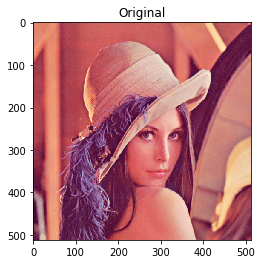

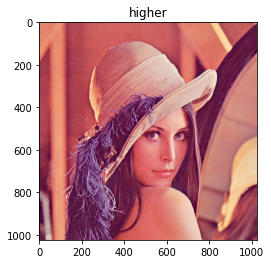

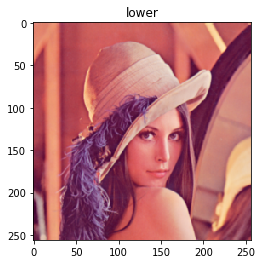

In [68]:
# pyrDown(img) # 원본 이미지의 1/4 사이즈
lower_reso = cv2.pyrDown(rgb) 

# 원본 이미지의 4배 사이즈
higher_reso = cv2.pyrUp(rgb) 


plt.title("Original")
plt.imshow(rgb)
plt.show()


plt.title("higher")
plt.imshow(higher_reso)
plt.show()

plt.title("lower")
plt.imshow(lower_reso)
plt.show()

## Laplacian Pyramid
### Laplacian Pyramid가 필요한 이유
Laplacian Pyramid는 Gaussian Pyramid에서 만들어 집니다. 


`cv2.pyrDown()`과 `cv2.pyrUp()` 함수를 사용하여 축소한 다음 확장을 하면 원본과 동일한 이미지를 얻을 수 없습니다.
 <img src='./img/downup.png' width=80%, Fig2> 

원본 이미지의 shape가 (225,400,3)을 `cv2.pyrDown()` 을 적용하면 행과 열이 2배씩 줄게 되고 소수점은 반올림이 되어 `(113,200,3)`이 됩니다. 이것을 다시 `cv2.pyrUp()`을 시키면 (226,400,3) 이 되어 원본 이미지와 1row 차이가 발생합니다.

In [79]:
# resize 255*400
ex_img = cv2.resize(rgb, (400, 225))
ex_img.shape

(225, 400, 3)

In [90]:
GAD = cv2.pyrDown(ex_img)
print('Downsamping shape:',GAD.shape)

Downsamping shape: (113, 200, 3)


In [91]:
GAU = cv2.pyrUp(GAD)
print('Upsamping shape:',GAU.shape)

Upsamping shape: (226, 400, 3)


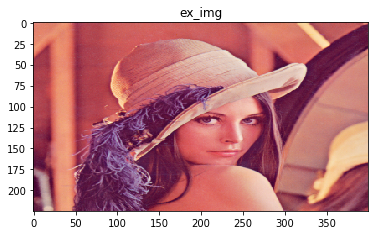

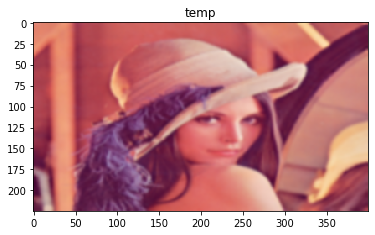

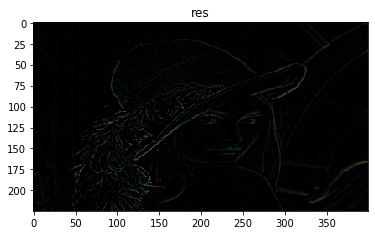

In [87]:
# resize 
temp = cv2.resize(GAU, (400, 225))
res = cv2.subtract(ex_img, temp)


plt.title("ex_img")
plt.imshow(ex_img)
plt.show()

plt.title("temp")
plt.imshow(temp)
plt.show()

plt.title("res")
plt.imshow(res)
plt.show()

### Laplacian Pyramid를 이용하여 합치기

실행순서
1. 2개의 이미지를 각각 Load함.
2. 각 이미지에 대해서 적당한 Gaussian Pyramid를 생성함.
3. Gaussian Pyramid를 이용하여 Laplacian Pyramid를 생성함.
4. 각 단계의 Laplicain Pyramid를 이용하여 각 이미지의 좌측과 우측을 결함.
5. 결함한 결과중 가장 작은 이미지를 확대하면서 동일 사이즈의 결합결과와 Add하여 외곽선을 선명하게 처리함

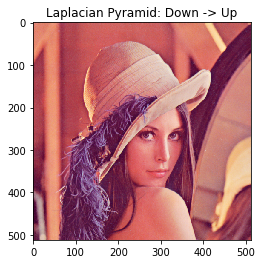

In [100]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# 1단계

image = cv2.imread("./img/lenna.png")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

A = rgb.copy()
B = rgb.copy()
# 2단계
# A 이미지에 대한 Gaussian Pyramid를 생성
# 점점 작아지는 Pyramid
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# B 이미지에 대한 Gaussian Pyramid 생성
# 점점 작아지는 Pyramid
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

# 3단계
# A 이미지에 대한 Laplacian Pyramid 생성
lpA = [gpA[5]] # n번째 추가된 Gaussian Image
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i]) #n번째 추가된 Gaussian Image를 Up Scale함.
    temp = cv2.resize(gpA[i-1], (GE.shape[:2][1], GE.shape[:2][0])) # 행렬의 크기를 동일하게 만듬.
    L = cv2.subtract(temp,GE) # n-1번째 이미지에서 n번째 Up Sacle한 이미지 차이 -> Laplacian Pyramid
    lpA.append(L)

# A 이미지와 동일하게 B 이미지도 Laplacian Pyramid 생성
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    temp = cv2.resize(gpB[i - 1], (GE.shape[:2][1], GE.shape[:2][0]))
    L = cv2.subtract(temp, GE)
    # L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

# 4단계
# Laplician Pyramid를 누적으로 좌측과 우측으로 재결함
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)


# 5단계
ls_ = LS[0] # 좌측과 우측이 결합된 가장 작은 이미지
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_) # Up Sacle
    temp = cv2.resize(LS[i],(ls_.shape[:2][1], ls_.shape[:2][0])) # 외곽선만 있는 이미지
    ls_ = cv2.add(ls_, temp) # UP Sacle된 이미지에 외곽선을 추가하여 선명한 이미지로 생성

# 원본 이미지를 그대로 붙인 경우
real = np.hstack((A[:,:int(cols/2)],B[:,int(cols/2):]))


plt.title("Laplacian Pyramid: Down -> Up")
plt.imshow(real)
plt.show()